# **Lista 2** 
### Rafał Głodek
***

### **Zadanie 1**

Tworzymy algorytm

In [43]:
def max_algorytm(liczby, indeks = 1, indeks_max = 0):
    obecny_max = liczby[indeks_max]
    if indeks == len(liczby):
        return obecny_max
    if obecny_max < liczby[indeks]:
        indeks_max = indeks
    return max_algorytm(liczby, indeks + 1, indeks_max)

Hipoteza:
Będzie miał on złożoność obliczeniową O(n). Działa on na zasadzie rekurencji, która jest wykonywana n razy, a w każdym wywołaniu sprawdza dwie liczby dokładnie raz.

Sprawdzimy tę złożoność eksperymentalnie

In [44]:
import random
def gen(start, koniec, n):
    """
    Function 
    Funkcja generująca losowy ciąg n liczb

    Input
    start(integer) - początek zakresu
    koniec(integer) - koniec zakresu
    n(integer) - liczba wyrazów ciągu

    Output 
    wynik(list) - wygenerowany ciąg
    """
    wynik = []
    for i in range(n):
        wynik.append(random.randint(start,koniec))
    return wynik

In [45]:
import matplotlib.pyplot as plt
import timeit

def stoper(funkcja, ile, roznica_dlugosci, start, koniec, n_0):
    """
    Function
    Funkcja Licząca czas wykonywania danej funkcji dla rosnących długości ciągów 

    Input
    funkcja(function) - funkcja, której złożoność chcemy sprawdzić
    ile(integer) - dla ilu list chcemy sprawdzić funkcję
    roznica_dlugosci(integer) - o ile mają się różnić długości kolejnych list
    start(integer) - początek zakresu dla losowania listy
    koniec(integer) - koniec zakresu dla losowania listy
    n_0(integer) - długość pierwszej listy

    Output
    czasy1(list) - lista z czasami odpowiadającymi kolejnym długościom 
    
    """
    czasy1 = []
    dlugosc = n_0
    for i in range(ile):
        czasy1.append(timeit.timeit(lambda: funkcja(gen(start, koniec, dlugosc)), number=100))
        dlugosc += roznica_dlugosci
    return czasy1

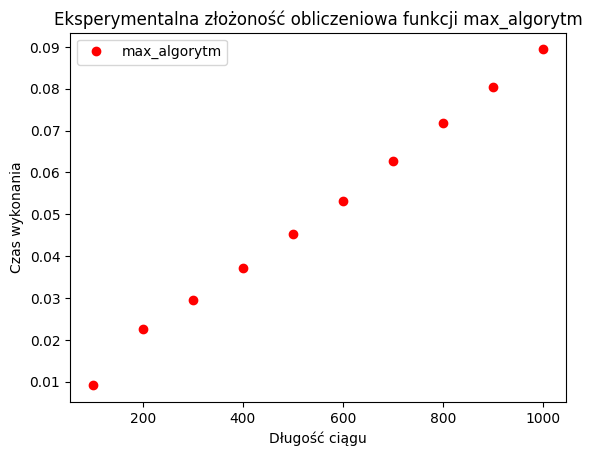

In [46]:
czasy_e1 = stoper(max_algorytm, 10, 100, 1, 100, 100)
xs1 = range(100, 1001, 100)
plt.plot(xs1, czasy_e1, "ro", label="max_algorytm")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji max_algorytm")
plt.legend(loc="best")
plt.show()

Widzimy, że krzywa układa się jak funkcja liniowa.Porównajmy złożoność w skali log-log.

In [47]:
from scipy.optimize import curve_fit
def liniowa(x,a,b):
    return a*x + b

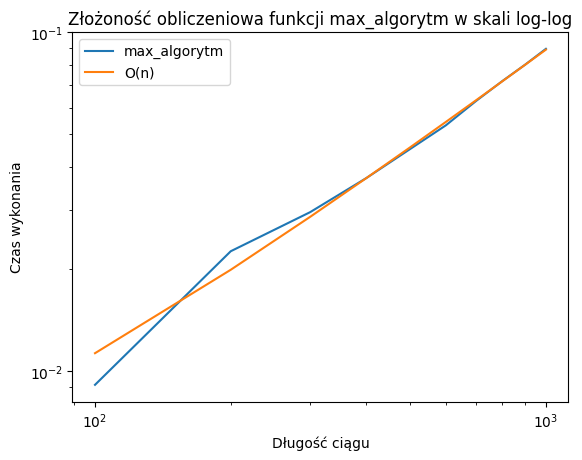

In [48]:
popt1, pcov1 = curve_fit(liniowa, xs1, czasy_e1)
plt.loglog(xs1, czasy_e1, label = "max_algorytm")
plt.loglog(xs1, liniowa(xs1,*popt1), label = "O(n)")
plt.xlabel("Długość ciągu")
plt.ylabel("Czas wykonania")
plt.title("Złożoność obliczeniowa funkcji max_algorytm w skali log-log")
plt.legend(loc='best')
plt.show()

Widzimy, że krzywe po czasie się pokrywają, więc możemy potwierdzić hipotezę, że max_algorytm ma złożoność O(n).

Teraz zmierzymy złożoność pamięciową tego algorytmu. Stwórzmy funkcję, która policzy zużycie pamięci.

In [49]:
import tracemalloc
def zuzycie_pamieci(funkcja, ile, roznica_dlugosci, start, koniec, n_0):
    zuzycie_curr = []
    zuzycie_peak = []
    dlugosc = n_0
    for i in range(ile):
        tracemalloc.clear_traces()
        tracemalloc.start()
        funkcja(gen(start, koniec, dlugosc))
        zuzycie_tuple = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        #zuzycie.append(zuzycie_tuple)
        zuzycie_curr.append(zuzycie_tuple[0])
        zuzycie_peak.append(zuzycie_tuple[1])
        dlugosc += roznica_dlugosci
    return zuzycie_curr, zuzycie_peak

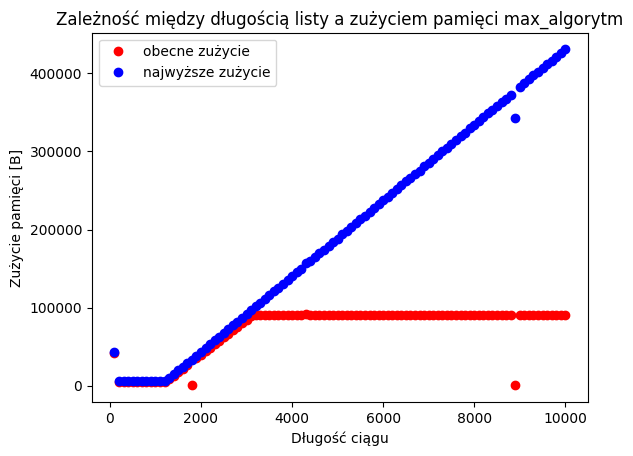

In [50]:
wyniki = zuzycie_pamieci(max_algorytm, 100, 10, 1, 100, 100)
xs = range(100, 10001, 100)
plt.plot(xs, wyniki[0], "ro", label="obecne zużycie")
plt.plot(xs, wyniki[1], "bo", label="najwyższe zużycie")
plt.xlabel("Długość ciągu")
plt.ylabel("Zużycie pamięci [B]")
plt.title("Zależność między długością listy a zużyciem pamięci max_algorytm")
plt.legend(loc="best")
plt.show()

Przy określeniu złożoności pamięciowej tego algorytmu, powinniśmy popatrzeć na zależność najwyższego zużycia od długości danych wejściowych. Widzimy, że maksymalna ilość pamięci jaką program zaalkował podczas swojego działania rośnie liniowo wraz ze zwiększaniem rozmiaru wejściowej listy. Można więc wyciągnąć wniosek, że algorytm ten ma złożoność pamięciową O(n).

### **Zadanie 2**

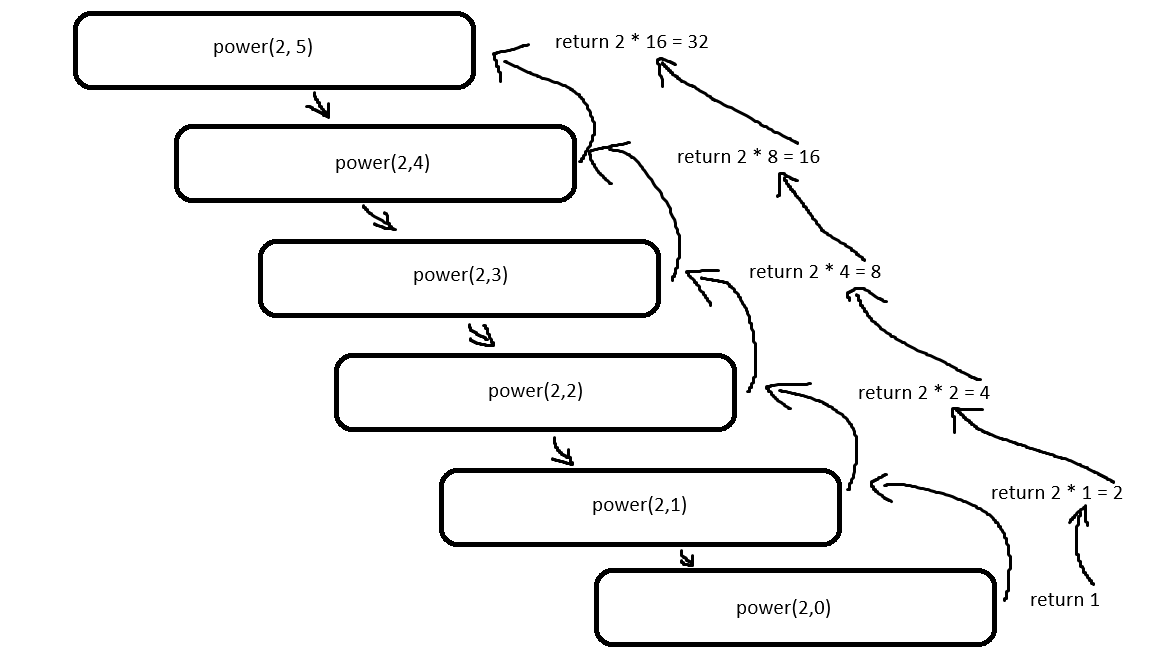

In [29]:
from PIL import Image
from IPython.display import display
img = Image.open("zad2.png")
display(img)


### **Zadanie 3**

In [55]:
def min_max_algorytm(liczby, indeks = 1, indeks_max = 0, indeks_min = 0):
    obecny_max = liczby[indeks_max]
    obecny_min = liczby[indeks_min]
    if indeks == len(liczby):
        return obecny_min, obecny_max
    if obecny_max < liczby[indeks]:
        indeks_max = indeks
    if liczby[indeks] < obecny_min:
        indeks_min = indeks
    return min_max_algorytm(liczby, indeks + 1, indeks_max, indeks_min)

In [58]:
print(min_max_algorytm([10000,6,2,43,-1,546,4,3,1,7,-1000]))

(-1000, 10000)


### **Zadanie 4**

In [65]:
def mnozenie(m, n, wynik = 0):
    if n == 0:
        return 0
    if n == 1:
        return wynik + m
    else:
        return mnozenie(m, n-1, wynik + m)

In [68]:
print(mnozenie(8,1))

8


### **Zadanie 5**

In [84]:
def palindrom(slowo):
    if len(slowo) == 1:
        return True
    if slowo[0].lower() == slowo[len(slowo)-1].lower():
        return palindrom(slowo[1:-1])
    else:
        return False

In [85]:
print(palindrom("Atak kata"))

True


### **Zadanie 6**

Funkcja generująca foldery

In [1]:
import os

In [88]:
def folder_gen(ile, path):
    name = "folder" + str(ile)
    cur_path = os.path.join(path,name)
    if ile == 1:
        os.mkdir(cur_path)
    else:
        os.mkdir(cur_path)
        folder_gen(ile-1, cur_path)


In [89]:
folder_gen(3, r"C:\Users\Rafal\OneDrive\Pulpit\AiSD")

In [2]:
def find(path, filename):
    for item in os.listdir(path):
        if os.path.isfile(os.path.join(path,item)):
            if item == filename:
                print(os.path.join(path, filename))
        elif os.path.isdir(os.path.join(path,item)):
            find(os.path.join(path,item), filename)

In [3]:
print(find(r"C:\Users\Rafal\OneDrive\Pulpit\AiSD\folder3", "tomek.txt"))

C:\Users\Rafal\OneDrive\Pulpit\AiSD\folder3\folder2\folder1\tomek.txt
C:\Users\Rafal\OneDrive\Pulpit\AiSD\folder3\tomek.txt
None
